1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as tlp
%matplotlib inline
import seaborn as ss

2.Loading the Dataset


In [ ]:
from google.colab import files
upload=files.upload()

In [ ]:
a=pd.read_csv('/content/abalone.csv')

In [ ]:
a.head()

In [ ]:
a['age']=a['Rings']+1.5
a=a.drop('Rings',axis=1)

Univariate Analysis


In [ ]:
ss.kdeplot(a['Diameter'])

Bi-Variate Analysis


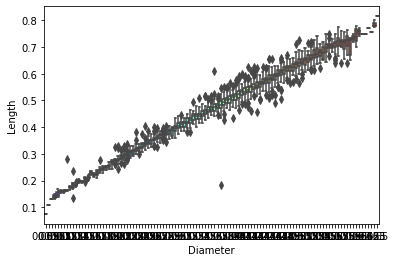

In [ ]:
ss.boxplot(x=a.Diameter,y = a.Length, palette='rainbow')

Multi-Variate Analysis


In [ ]:
ss.pairplot(a)


Descriptive Statistics

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [ ]:
a['Diameter'].describe()

count    4177.000000
mean        0.407881
std         0.099240
min         0.055000
25%         0.350000
50%         0.425000
75%         0.480000
max         0.650000
Name: Diameter, dtype: float64

In [ ]:
a['Sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object>

Checking for missing values and dealing with them

In [ ]:
a.isnull()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [ ]:
a.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

Find the outliers and replace the outliers

In [ ]:
a=pd.get_dummies(a)

In [ ]:
dummy_a=a

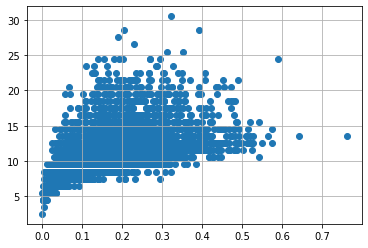

In [ ]:
var='Viscera weight'
tlp.scatter(x=a[var],y=a['age'])
tlp.grid(True)

In [ ]:
a.drop(a[(a['Viscera weight']>0.5)&
         (a['age']<20)].index, inplace=True)
a.drop(a[(a['Viscera weight']<0.5)&(a['age']>25)].index, inplace=True)

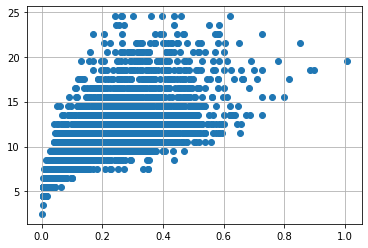

In [ ]:
var='Shell weight'
tlp.scatter(x=a[var],y=a['age'])
tlp.grid(True)

In [ ]:
a.drop(a[(a['Shell weight'] > 0.6) &
          (a['age'] < 25)].index, inplace = True)
a.drop(a[(a['Shell weight']<0.8) & (
a['age'] > 25)].index, inplace = True)

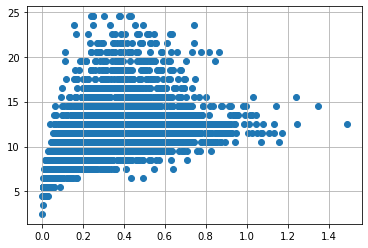

In [ ]:
var = 'Shucked weight'
tlp.scatter(x = a[var], y =a['age'])
tlp.grid(True)

In [ ]:
a.drop(a[(a['Whole weight'] >= 2.5) &
          (a['age'] < 25)].index, inplace = True)
a.drop(a[(a['Whole weight']<2.5) & (
a['age'] > 25)].index, inplace = True)

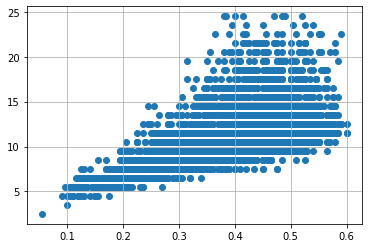

In [ ]:
var = 'Diameter'
tlp.scatter(x = a[var], y = a['age'])
tlp.grid(True)

In [ ]:
a.drop(a[(a['Diameter'] <0.1) &
          (a['age'] < 5)].index, inplace = True)
a.drop(a[(a['Diameter']<0.6) & (
a['age'] > 25)].index, inplace = True)
a.drop(a[(a['Diameter']>=0.6) & (
a['age'] < 25)].index, inplace = True)

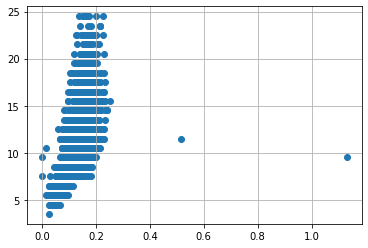

In [ ]:
var = 'Height'
tlp.scatter(x = a[var], y = a['age'])
tlp.grid(True)

In [ ]:
a.drop(a[(a['Height'] > 0.4) &
          (a['age'] < 15)].index, inplace = True)
a.drop(a[(a['Height']<0.4) & (
a['age'] > 25)].index, inplace = True)

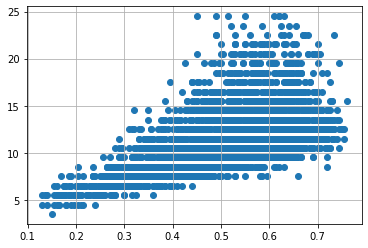

In [ ]:
var = 'Length'
tlp.scatter(x = a[var], y = a['age'])
tlp.grid(True)

In [ ]:
a.drop(a[(a['Length'] <0.1) &
          (a['age'] < 5)].index, inplace = True)
a.drop(a[(a['Length']<0.8) & (
a['age'] > 25)].index, inplace = True)
a.drop(a[(a['Length']>=0.8) & (a['age'] < 25)].index, inplace = True)

Checking for categorical columns

In [ ]:
numerical_features = a.select_dtypes(include = [np.number]).columns
categorical_features = a.select_dtypes(include = [np.object]).columns
numerical_features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [ ]:
categorical_features

Index([], dtype='object')

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(a.Length.value_counts())

0.550    93
0.575    93
0.625    93
0.580    92
0.600    86
         ..
0.755     2
0.220     2
0.150     1
0.135     1
0.760     1
Name: Length, Length: 126, dtype: int64


In [ ]:
x=a.iloc[:,:5]
x

,Length,Diameter,Height,Whole weight,Shucked weight
0,0.455,0.365,0.095,0.5140,0.2245
1,0.350,0.265,0.090,0.2255,0.0995
2,0.530,0.420,0.135,0.6770,0.2565
3,0.440,0.365,0.125,0.5160,0.2155
4,0.330,0.255,0.080,0.2050,0.0895
...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700
4173,0.590,0.440,0.135,0.9660,0.4390
4174,0.600,0.475,0.205,1.1760,0.5255
4175,0.625,0.485,0.150,1.0945,0.5310


In [ ]:
y=a.iloc[:,:5]
y

,Length,Diameter,Height,Whole weight,Shucked weight
0,0.455,0.365,0.095,0.5140,0.2245
1,0.350,0.265,0.090,0.2255,0.0995
2,0.530,0.420,0.135,0.6770,0.2565
3,0.440,0.365,0.125,0.5160,0.2155
4,0.330,0.255,0.080,0.2050,0.0895
...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700
4173,0.590,0.440,0.135,0.9660,0.4390
4174,0.600,0.475,0.205,1.1760,0.5255
4175,0.625,0.485,0.150,1.0945,0.5310


Spliting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Building the model

In [ ]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

1.Training the model

2.Testing the model

In [ ]:
x_test[0:5]

,Length,Diameter,Height,Whole weight,Shucked weight
3284,0.565,0.440,0.155,0.8680,0.3480
3809,0.520,0.375,0.135,0.5375,0.2210
973,0.525,0.400,0.140,0.7325,0.3340
944,0.465,0.350,0.125,0.4820,0.2300
1812,0.650,0.485,0.160,1.7395,0.5715


In [ ]:
y_test[0:5]

,Length,Diameter,Height,Whole weight,Shucked weight
3284,0.565,0.440,0.155,0.8680,0.3480
3809,0.520,0.375,0.135,0.5375,0.2210
973,0.525,0.400,0.140,0.7325,0.3340
944,0.465,0.350,0.125,0.4820,0.2300
1812,0.650,0.485,0.160,1.7395,0.5715


Scaling the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)

In [ ]:
mlrpred=mlr.predict(x_test[0:9])

mlrpred

array([[0.565 , 0.44  , 0.155 , 0.868 , 0.348 ],
       [0.52  , 0.375 , 0.135 , 0.5375, 0.221 ],
       [0.525 , 0.4   , 0.14  , 0.7325, 0.334 ],
       [0.465 , 0.35  , 0.125 , 0.482 , 0.23  ],
       [0.65  , 0.485 , 0.16  , 1.7395, 0.5715],
       [0.56  , 0.445 , 0.16  , 0.8965, 0.42  ],
       [0.65  , 0.565 , 0.2   , 1.6645, 0.753 ],
       [0.56  , 0.455 , 0.125 , 0.943 , 0.344 ],
       [0.71  , 0.57  , 0.195 , 1.9805, 0.9925]])

Measuring the performance using metrics

In [ ]:
from sklearn.metrics import r2_score
r2_score(mlr.predict(x_test),y_test)

1.0